In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime

### Dados

#### f(x1, x2, x3) = x1 XOR x2 XOR x3

In [3]:
def xor(a, b):
    return int(a != b)

Xa = []
Ya = []

for i in (0, 1):
    for j in (0, 1):
        for k in (0, 1):
            Xa.append([i, j, k])
            Ya.append(xor(xor(i, j), k))
            
for i in range(len(Xa)):
    print(Xa[i], Ya[i])
    
Xa = np.array(Xa)
Ya = np.array(Ya)

[0, 0, 0] 0
[0, 0, 1] 1
[0, 1, 0] 1
[0, 1, 1] 0
[1, 0, 0] 1
[1, 0, 1] 0
[1, 1, 0] 0
[1, 1, 1] 1


### f(x) = sen(pi * x)/(pi * x)

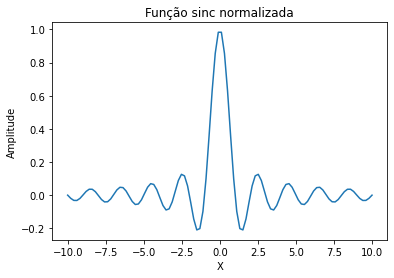

In [4]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

plt.plot(x, np.sinc(x))
plt.title("Função sinc normalizada")
plt.ylabel("Amplitude")
plt.xlabel("X")
plt.show()

In [5]:
X, Y = np.meshgrid(x, y)
Z = np.sinc(np.sqrt(X**2 + Y**2))

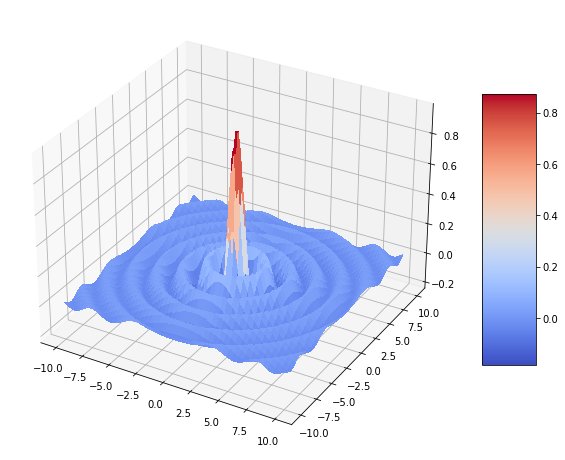

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [7]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

Xb = np.vstack([X.ravel(), Y.ravel()]).T

Yb = np.sinc(np.sqrt(np.sum(Xb**2, axis=1)))

In [8]:
Xb

array([[-10.       , -10.       ],
       [ -9.7979798, -10.       ],
       [ -9.5959596, -10.       ],
       ...,
       [  9.5959596,  10.       ],
       [  9.7979798,  10.       ],
       [ 10.       ,  10.       ]])

### Modelos

In [30]:
params = {
    "solver": 'sgd',
    "alpha": 1e-5,
    "shuffle": False, # eu quero fazer o shuffle manualmente
    "random_state": 1
}
# MLPa = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 2), **params)
# MLPa2 = MLPClassifier(hidden_layer_sizes=(5, 5, 2), **params)
# MLPa3 = MLPClassifier(hidden_layer_sizes=(5, 2), **params)
# MLPa4 = MLPClassifier(hidden_layer_sizes=(5,), **params)

# MLPb = MLPRegressor(hidden_layer_sizes=(5, 5, 5, 2), **params)
# MLPb2 = MLPRegressor(hidden_layer_sizes=(5, 5, 2), **params)
# MLPb3 = MLPRegressor(hidden_layer_sizes=(5, 2), **params)
# MLPb4 = MLPRegressor(hidden_layer_sizes=(5,), **params)

MLPb5 = MLPRegressor(hidden_layer_sizes=(100, 100, 100), **params)

# MLPb_tanh = MLPRegressor(activation='tanh',hidden_layer_sizes=(5, 5, 5, 2), **params)
MLPb_tanh2 = MLPRegressor(activation='tanh',hidden_layer_sizes=(100, 100, 100), **params)

### Treinamento

In [8]:
def treinar(modelo, x, y, xtest=None, ytest=None, **params):
    start = datetime.datetime.now()
    N_TRAIN_SAMPLES = x.shape[0]
    N_EPOCHS = params.get('epochs', 25)
    N_BATCH = params.get('batch', 32)
    CLASSES = params.get('classes', True)
    PRINT_STEP = params.get('printstep', N_EPOCHS // 3)
    
    if CLASSES:
        N_CLASSES = np.unique(y)
    
    scores_train = []
    errors_train = []
    scores_test = []
    errors_test = []
    
    # EPOCH
    epoch = 1
    while epoch <= N_EPOCHS:
        if PRINT_STEP and epoch % PRINT_STEP == 0:
            print('epoch: ', epoch)
        # SHUFFLING
        random_perm = np.random.permutation(x.shape[0])
        mini_batch_index = 0
        while True:
            # MINI-BATCH
            indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
            if CLASSES:
                modelo.partial_fit(x[indices], y[indices], classes=N_CLASSES)
            else:
                modelo.partial_fit(x[indices], y[indices])
            mini_batch_index += N_BATCH

            if mini_batch_index >= N_TRAIN_SAMPLES:
                break

        # SCORE TRAIN
        scores_train.append(modelo.score(x, y))

        # SCORE TEST
#         scores_test.append(modelo.score(X_test, y_test))

        # ERRORS TRAIN
        errors_train.append(mean_squared_error(modelo.predict(x), y))

        # ERRORS TEST
#         errors_test.append(mean_squared_error(modelo.predict(X_test), y_test))

        epoch += 1
    
    print(str(datetime.datetime.now() - start).split('.')[0])
    
    return {
        "scores_train": scores_train,
        "errors_train": errors_train,
#         "scores_test": scores_test,
#         "errors_test": errors_test,
    }

def report(resultados):
    n_subplots = 2
    fig, ax = plt.subplots(n_subplots, sharex=True, sharey=False, figsize=(5, n_subplots * 5))
    ax[0].plot(resultados["scores_train"])
    ax[0].set_title('Train')
#     ax[1].plot(resultados["scores_test"])
#     ax[1].set_title('Test')
    ax[1].plot(resultados["errors_train"])
    ax[1].set_title('Train error')
#     ax[3].plot(resultados["errors_test"])
#     ax[3].set_title('Test error')
    fig.suptitle("Accuracy/error over epochs", fontsize=14)
    plt.show()
    
    return fig, ax
    
    

### Aproximando a função XOR

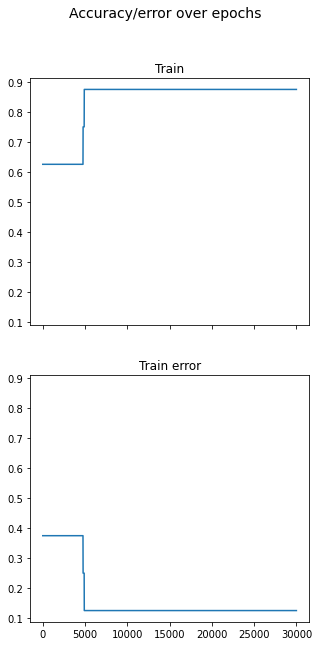

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [62]:
resultado_a = treinar(MLPa, Xa, Ya, epochs=30000, printstep=5000)
report(resultado_a)

epoch:  10000
epoch:  20000
epoch:  30000


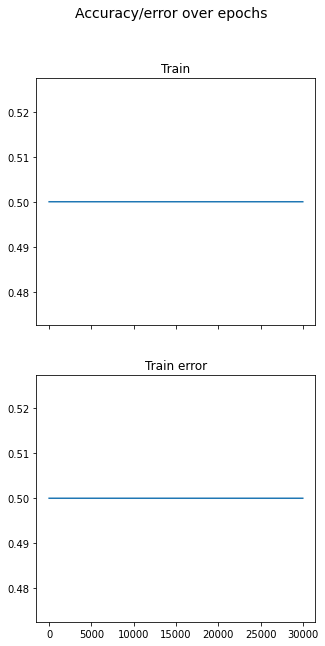

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [69]:
resultado_a2 = treinar(MLPa2, Xa, Ya, epochs=30000, printstep=10000)
report(resultado_a2)

epoch:  10000
epoch:  20000
epoch:  30000


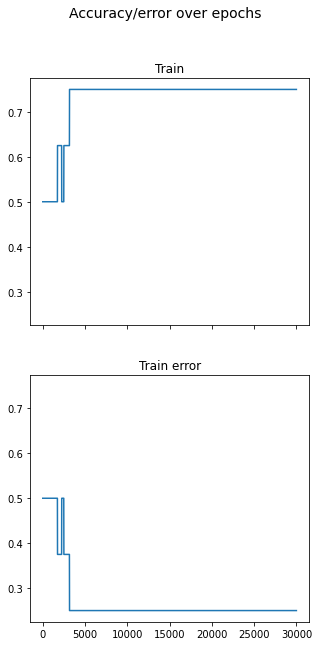

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [70]:
resultado_a3 = treinar(MLPa3, Xa, Ya, epochs=30000, printstep=10000)
report(resultado_a3)

epoch:  10000
epoch:  20000
epoch:  30000


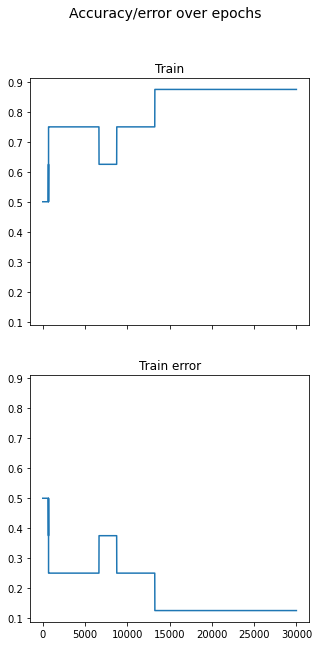

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [71]:
resultado_a4 = treinar(MLPa4, Xa, Ya, epochs=30000, printstep=10000)
report(resultado_a4)

### Aproximando a função Sinc

In [15]:
def overlaycompare(modelo, inputx):
    x = np.linspace(-10, 10, 10000)
    sinc = np.sinc(x)
    fx = modelo.predict(inputx)

    plt.plot(x, sinc)
    plt.plot(x, fx)
    plt.show()

epoch:  160
epoch:  320
epoch:  480
0:02:28


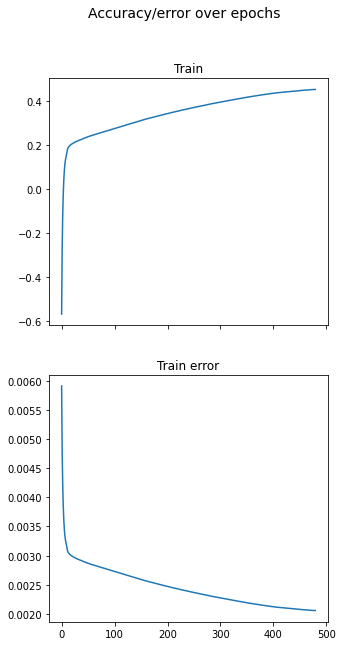

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [22]:
resultado_b = treinar(MLPb, Xb, Yb, classes=False, epochs=480)
report(resultado_b)

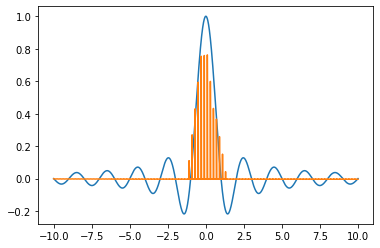

In [23]:
overlaycompare(MLPb, Xb)

epoch:  160
epoch:  320
epoch:  480
0:02:13


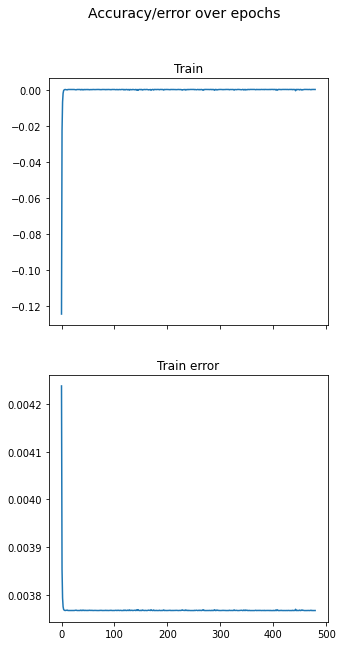

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [24]:
resultado_b2 = treinar(MLPb2, Xb, Yb, classes=False, epochs=480)
report(resultado_b2)

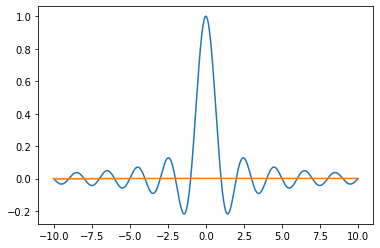

In [25]:
overlaycompare(MLPb2, Xb)

epoch:  160
epoch:  320
epoch:  480
0:02:03


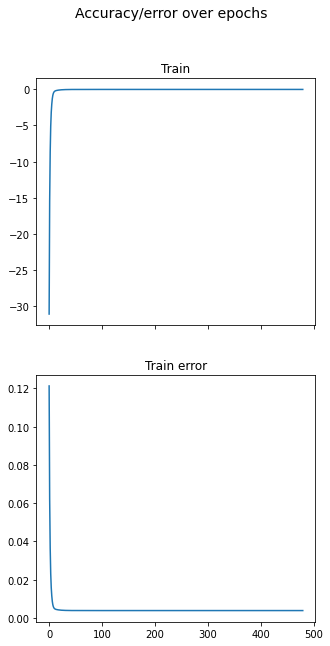

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [26]:
resultado_b3 = treinar(MLPb3, Xb, Yb, classes=False, epochs=480)
report(resultado_b3)

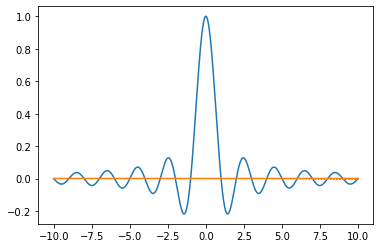

In [27]:
overlaycompare(MLPb3, Xb)

epoch:  26
epoch:  52
epoch:  78
0:00:18


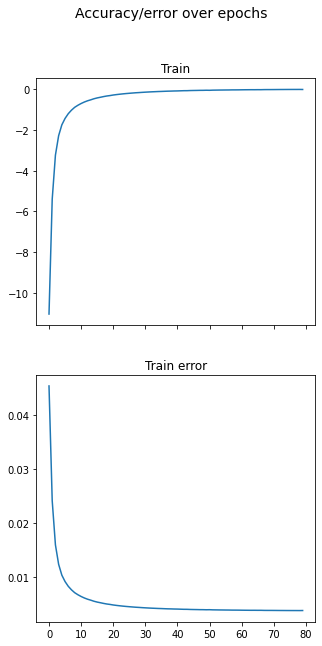

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [28]:
resultado_b4 = treinar(MLPb4, Xb, Yb, classes=False, epochs=80)
report(resultado_b4)

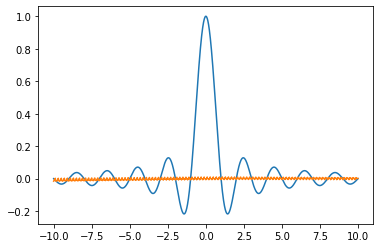

In [29]:
overlaycompare(MLPb4, Xb)

epoch:  26
epoch:  52
epoch:  78
0:01:07


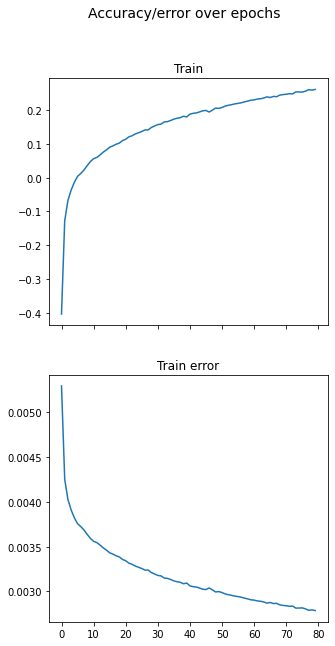

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [31]:
resultado_b5 = treinar(MLPb5, Xb, Yb, classes=False, epochs=80)
report(resultado_b5)

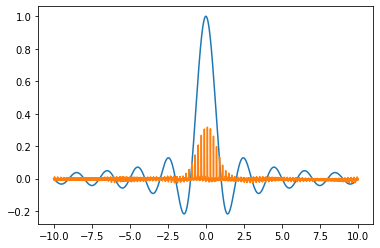

In [32]:
overlaycompare(MLPb5, Xb)

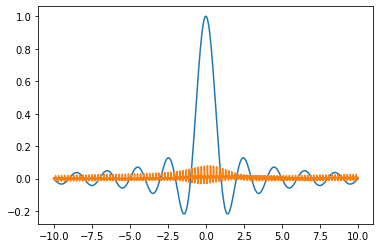

In [16]:
overlaycompare(MLPb_tanh, Xb)

epoch:  160
epoch:  320
epoch:  480
0:11:27


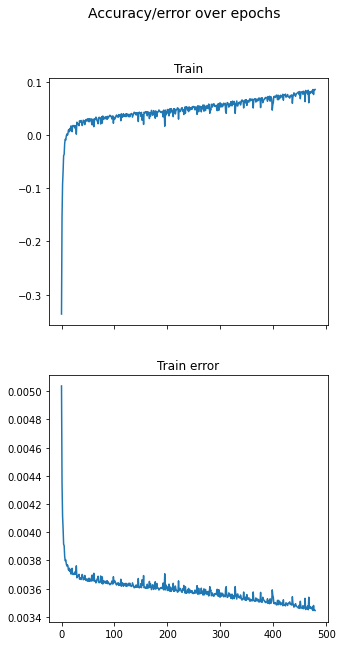

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [33]:
resultado_tanh2 = treinar(MLPb_tanh2, Xb, Yb, classes=False, epochs=480)
report(resultado_tanh2)

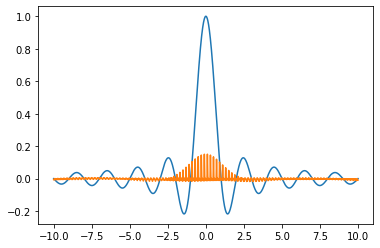

In [34]:
overlaycompare(MLPb_tanh2, Xb)

### Tentando com seno

In [88]:
def overlaycompare2(modelo, inputx, output):
    x = np.linspace(0, 6, 100)
    fx = modelo.predict(inputx)

    plt.plot(x, output)
    plt.plot(x, fx)
    plt.show()

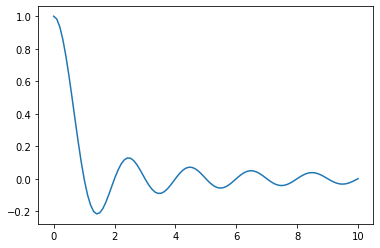

In [90]:
x = np.linspace(0, 10, 100)
y = np.sinc(x)
plt.plot(x, y)

In [81]:
Xsin = x.reshape(-1, 1)

In [107]:
params2 = {
#     "solver": 'sgd',
#     "alpha": 1e-5,
    "shuffle": True,
    "random_state": 1,
    "activation": "tanh"
}

epoch:  1000
epoch:  2000
epoch:  3000
0:00:22


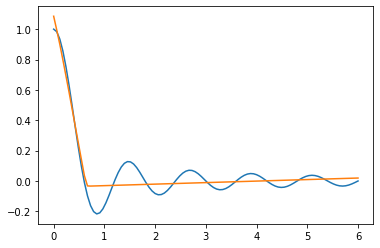

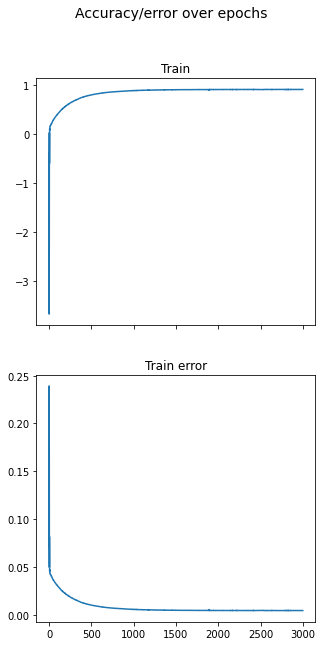

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [91]:
mlpsin = MLPRegressor(hidden_layer_sizes=(100,), **params)
resultado_mlpsin = treinar(mlpsin, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin, Xsin, y)
report(resultado_mlpsin)

epoch:  4000
epoch:  8000
epoch:  12000
0:01:38


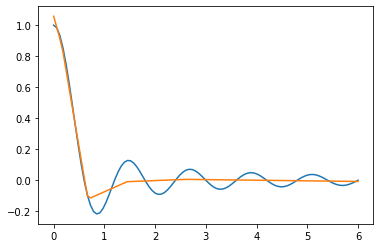

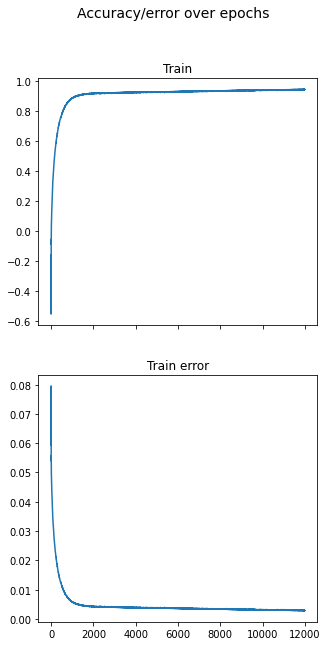

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [92]:
mlpsin2 = MLPRegressor(hidden_layer_sizes=(300,), **params)
resultado_mlpsin2 = treinar(mlpsin2, Xsin, y, classes=False, epochs=12000)
overlaycompare2(mlpsin2, Xsin, y)
report(resultado_mlpsin2)

epoch:  4000
epoch:  8000
epoch:  12000
0:01:53


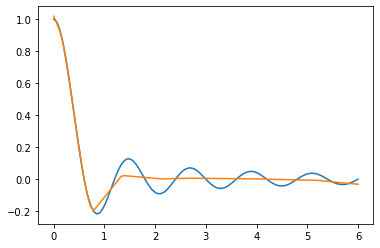

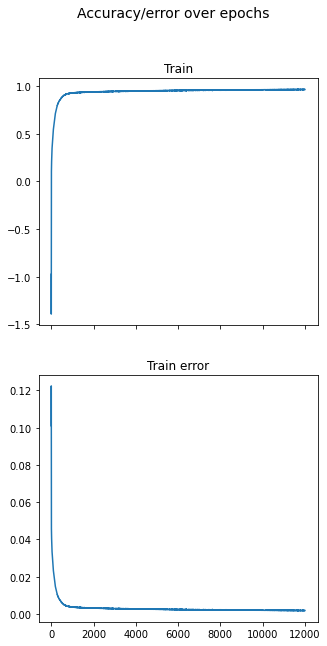

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [93]:
mlpsin3 = MLPRegressor(hidden_layer_sizes=(100, 100), **params)
resultado_mlpsin3 = treinar(mlpsin3, Xsin, y, classes=False, epochs=12000)
overlaycompare2(mlpsin3, Xsin, y)
report(resultado_mlpsin3)

epoch:  4000
epoch:  8000
epoch:  12000
0:02:47


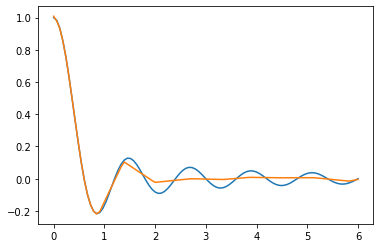

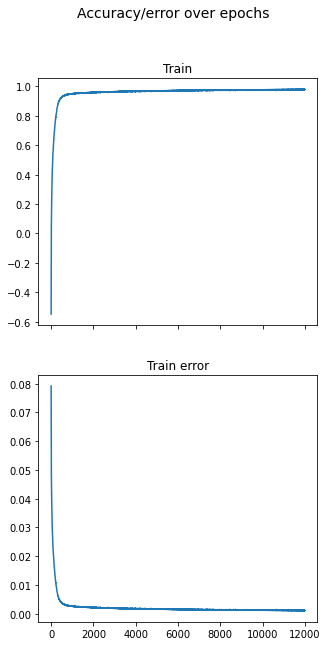

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [94]:
mlpsin4 = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), **params)
resultado_mlpsin4 = treinar(mlpsin4, Xsin, y, classes=False, epochs=12000)
overlaycompare2(mlpsin4, Xsin, y)
report(resultado_mlpsin4)

epoch:  1000
epoch:  2000
epoch:  3000
0:01:10


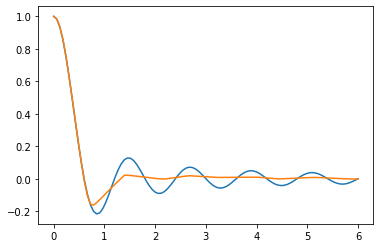

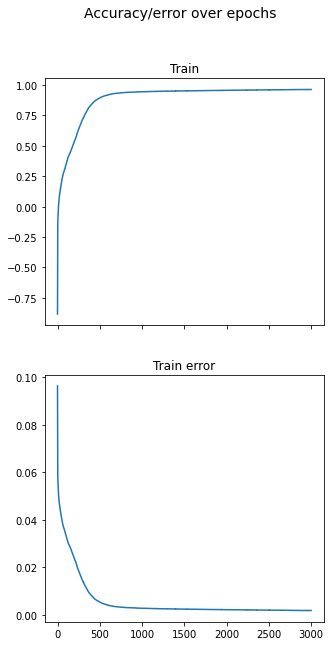

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [95]:
mlpsin5 = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100), **params)
resultado_mlpsin5 = treinar(mlpsin5, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin5, Xsin, y)
report(resultado_mlpsin5)

epoch:  1000
epoch:  2000
epoch:  3000
0:00:16


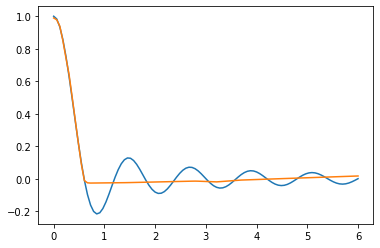

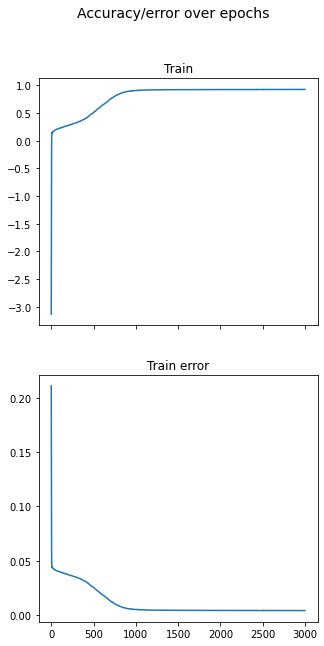

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [96]:
mlpsin6 = MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10), **params)
resultado_mlpsin6 = treinar(mlpsin6, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin6, Xsin, y)
report(resultado_mlpsin6)

epoch:  1000
epoch:  2000
epoch:  3000
0:00:15


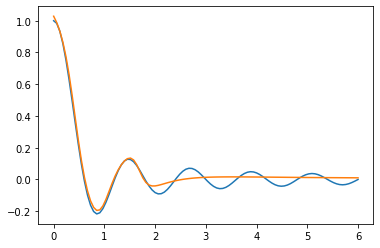

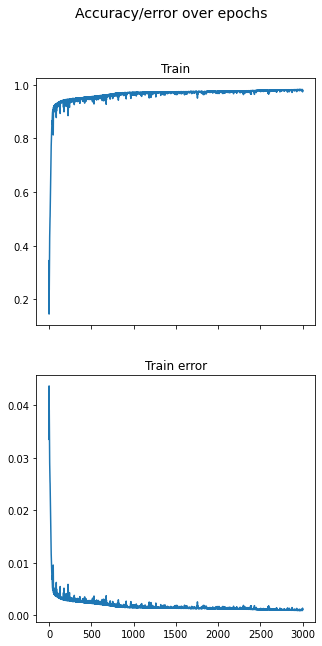

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [98]:
mlpsin7tanh = MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10), **params2)
resultado_mlpsin7tanh = treinar(mlpsin7tanh, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin7tanh, Xsin, y)
report(resultado_mlpsin7tanh)

epoch:  1000
epoch:  2000
epoch:  3000
0:02:24


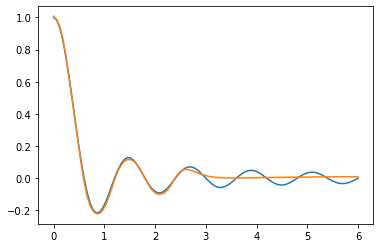

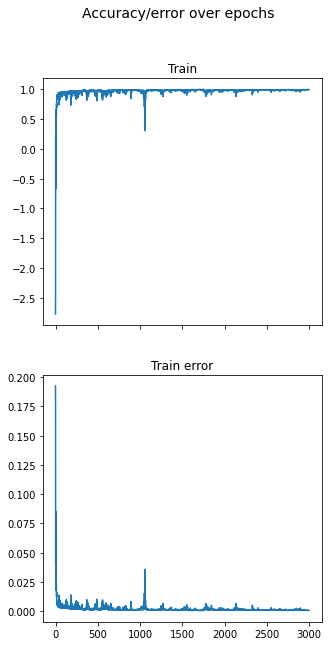

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [99]:
mlpsin8tanh = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100), **params2)
resultado_mlpsin8tanh = treinar(mlpsin8tanh, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin8tanh, Xsin, y)
report(resultado_mlpsin8tanh)

#### (melhor resultado)

epoch:  1000
epoch:  2000
epoch:  3000
0:02:18


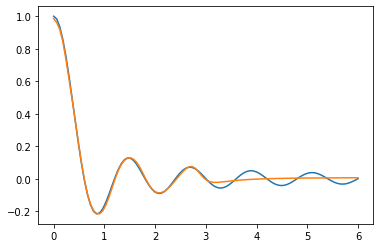

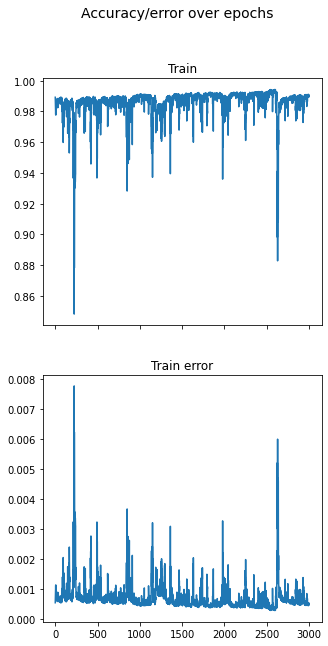

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [100]:
# mlpsin8tanh = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100), **params2)
resultado_mlpsin8tanh = treinar(mlpsin8tanh, Xsin, y, classes=False, epochs=3000)
overlaycompare2(mlpsin8tanh, Xsin, y)
report(resultado_mlpsin8tanh)

epoch:  166
epoch:  332
epoch:  498
0:00:33


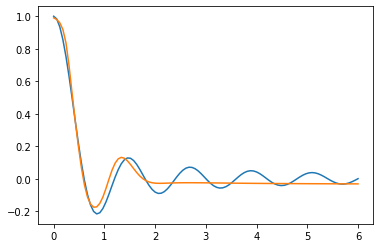

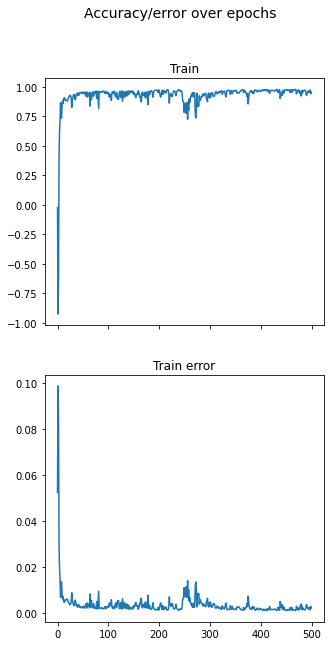

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [109]:
layers = (100,) * 16
mlpsin9tanh = MLPRegressor(hidden_layer_sizes=layers, **params2)
resultado_mlpsin9tanh = treinar(mlpsin9tanh, Xsin, y, classes=False, epochs=500)
overlaycompare2(mlpsin9tanh, Xsin, y)
report(resultado_mlpsin9tanh)

### f ( x ) = x1^2 + x2^2 + 2 * x1 * x2 * cos(pi * x1 * x2 ) + x1 + x2 - 1

In [139]:
def funcao_c(a, b):
    return a**2 + b**2 + 2*a*b*np.cos(np.pi*a*b) + a + b - 1

def overlaycompare3(modelo, inputx, output):
    x1 = np.linspace(-1, 1, 100)
    x2 = np.linspace(-1, 1, 100)

    X1, X2 = np.meshgrid(x1, x2)
    
    fx = modelo.predict(inputx)

    plt.plot(x, output)
    plt.plot(x, fx)
    plt.show()

In [124]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)

X1, X2 = np.meshgrid(x1, x2)
P1 = X1**2 + X2**2 + X1 + X2 - 1
P2 = 2 * X1 * X2 * np.cos(np.pi * X1 * X2)
Z = P1 + P2

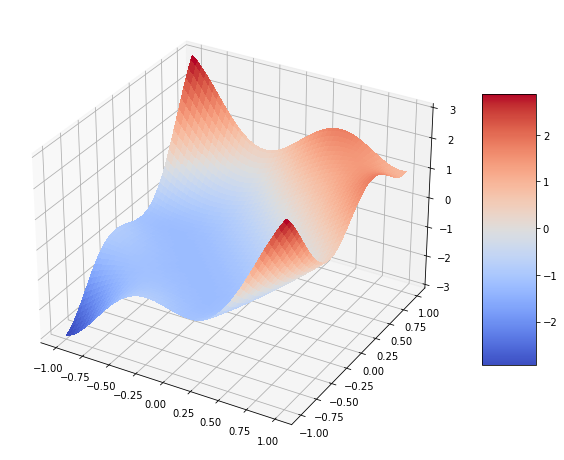

In [125]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [135]:
Xc = np.vstack([X1.ravel(), X2.ravel()]).T
Yc = np.array([funcao_c(a,b) for a,b in Xc])

### Modelos

In [138]:
params3 = {
    "random_state": 1,
    "activation": "tanh"
}

In [ ]:
layers = (100,) * 16
mc1 = MLPRegressor(hidden_layer_sizes=layers, **params3)
resultado_mc1 = treinar(mc1, Xc, Yc, classes=False, epochs=50, printstep=1)

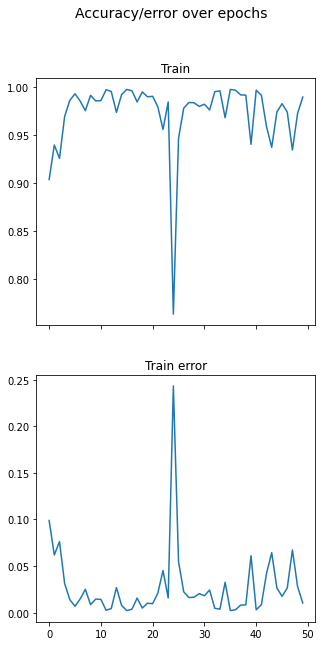

(<Figure size 360x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train'}>,
        <AxesSubplot:title={'center':'Train error'}>], dtype=object))

In [143]:
# overlaycompare3(mc1, Xc, Yc)
report(resultado_mc1)